# Explore here

track         : The Diary of Jane - Single Version
popularity    : 73
duration      : 3:20 minutes

track         : Awaken
popularity    : 68
duration      : 3:38 minutes

track         : I Will Not Bow
popularity    : 68
duration      : 3:36 minutes

track         : Breath
popularity    : 68
duration      : 3:38 minutes

track         : Dance With The Devil
popularity    : 66
duration      : 3:47 minutes

track         : So Cold - Remix
popularity    : 63
duration      : 4:33 minutes

track         : Angels Fall
popularity    : 63
duration      : 3:48 minutes

track         : Blow Me Away - Soundtrack Version
popularity    : 52
duration      : 3:25 minutes

track         : Failure
popularity    : 59
duration      : 3:34 minutes

track         : Blood
popularity    : 58
duration      : 3:09 minutes

                                 name  popularity  duration_ms  \
0  The Diary of Jane - Single Version          73       200546   
1                              Awaken          68       2

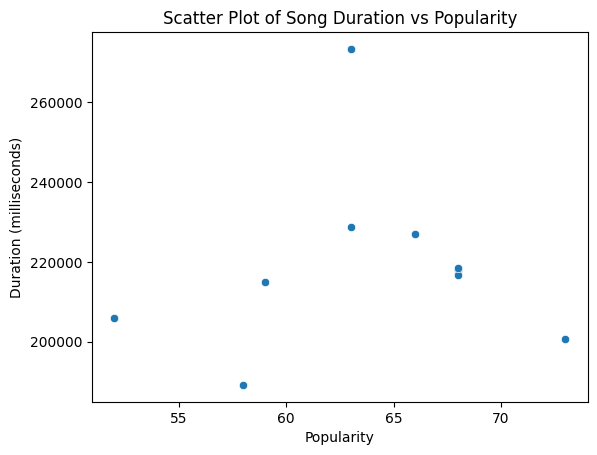

Correlation between duration and popularity: 0.10
There is no significant relationship between song duration and popularity.
Song duration does not impact popularity.


In [87]:
import os
import pandas as pd
import seaborn as sns
from dotenv import load_dotenv
import spotipy as sp
import matplotlib.pyplot as plt

from spotipy.oauth2 import SpotifyClientCredentials

# load the .env file variables
load_dotenv()

#Insert the info to work with it
client_id = os.environ.get('CLIENT_ID')
client_secret = os.environ.get('CLIENT_SECRET')

breaking_benjamin_uri = 'spotify:artist:5BtHciL0e0zOP7prIHn3pP'
client_credentials_manager = SpotifyClientCredentials(client_id, client_secret)
spotify = spotipy.Spotify(client_credentials_manager=client_credentials_manager)


results = spotify.artist_top_tracks('5BtHciL0e0zOP7prIHn3pP')

#Create a function to convert milliseconds to minutes
def mil_convert(milliseconds):
   seconds, milliseconds = divmod(milliseconds, 1000)
   minutes, seconds = divmod(seconds, 60)
   return minutes, seconds

# Pull the information using 'track' with the most played songs of the artist, keep the name of the song, the popularity and the duration (in minutes).
for track in results['tracks']:
    milliseconds = track['duration_ms']
    minutes, seconds = mil_convert(milliseconds)
    print('track         : ' + track['name'])
    print('popularity    : ' + str(track['popularity']))
    print(f'duration      : {minutes}:{seconds:02d} minutes')
    print()

#Convert it to a DataFrame
track_list = []

for track in results['tracks']:
    track_info = {'name': track['name'], 'popularity': track['popularity'], 'duration_ms': track['duration_ms'], 'album_name': track['album']['name'], 'release_date': track['album']['release_date'], 'artist_name': track['artists'][0]['name']}
    track_list.append(track_info)

df = pd.DataFrame(track_list)

#Sort by popularity
df_sorted = df.sort_values(by='popularity', ascending=False)

#Show top 3 songs
top_3_songs = df_sorted.head(3)
print(top_3_songs)

#Create scatter plot

sns.scatterplot(data=df, x='popularity', y='duration_ms')
plt.title('Scatter Plot of Song Duration vs Popularity')
plt.ylabel('Duration (milliseconds)')
plt.xlabel('Popularity')
plt.show()

# Answer Correlation question
correlation = df['duration_ms'].corr(df['popularity'])
print(f'Correlation between duration and popularity: {correlation:.2f}')

print(f'There is no significant relationship between song duration and popularity.\nSong duration does not impact popularity.')